In [70]:
import tensorflow as tf
import os

In [72]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [74]:
import cv2
from PIL import Image

In [76]:
data_dir='filterimage'
image_exts=['jpeg','jpg','bmp','png']


In [78]:
imgg=cv2.imread(os.path.join(data_dir,'happy','960x0.jpg'))
print(imgg)

[[[253 252 248]
  [253 252 248]
  [253 252 248]
  ...
  [255 253 253]
  [255 253 253]
  [255 253 253]]

 [[253 252 248]
  [253 252 248]
  [253 252 248]
  ...
  [255 253 253]
  [255 253 253]
  [255 253 253]]

 [[253 252 248]
  [253 252 248]
  [253 252 248]
  ...
  [255 253 253]
  [255 253 253]
  [255 253 253]]

 ...

 [[ 71  99 116]
  [121 149 166]
  [130 158 175]
  ...
  [132 162 203]
  [132 162 203]
  [132 162 203]]

 [[111 139 156]
  [136 164 181]
  [129 157 174]
  ...
  [132 162 203]
  [132 162 203]
  [132 162 203]]

 [[125 153 170]
  [147 175 192]
  [144 172 189]
  ...
  [131 161 202]
  [131 161 202]
  [131 161 202]]]


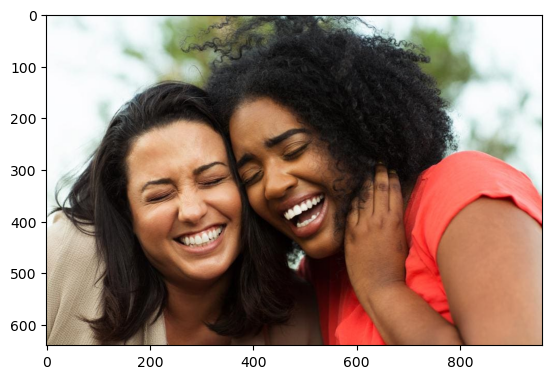

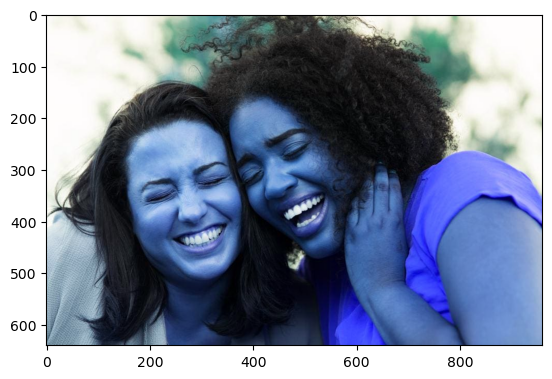

In [80]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(imgg,cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(imgg)

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
data=tf.keras.utils.image_dataset_from_directory('filterimage',batch_size=20,image_size=(128,128))

Found 184 files belonging to 2 classes.


In [86]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

In [88]:
batch

(array([[[[ 71.95947  ,  86.95947  ,  91.95947  ],
          [ 81.59717  ,  96.59717  , 101.59717  ],
          [ 72.00049  ,  87.00049  ,  92.00049  ],
          ...,
          [  9.       ,   9.       ,   9.       ],
          [  8.709961 ,   8.709961 ,   8.709961 ],
          [  6.9375   ,   6.9375   ,   6.9375   ]],
 
         [[ 70.015625 ,  85.015625 ,  90.015625 ],
          [ 81.29199  ,  96.29199  , 101.29199  ],
          [ 75.51416  ,  90.51416  ,  95.51416  ],
          ...,
          [  9.       ,   9.       ,   9.       ],
          [  8.942871 ,   8.942871 ,   8.942871 ],
          [  8.59375  ,   8.59375  ,   8.59375  ]],
 
         [[ 71.12549  ,  86.12549  ,  91.12549  ],
          [ 82.723145 ,  97.723145 , 102.723145 ],
          [ 81.609375 ,  96.609375 , 101.609375 ],
          ...,
          [  9.       ,   9.       ,   9.       ],
          [  8.67041  ,   8.67041  ,   8.67041  ],
          [  6.65625  ,   6.65625  ,   6.65625  ]],
 
         ...,
 
         [[ 

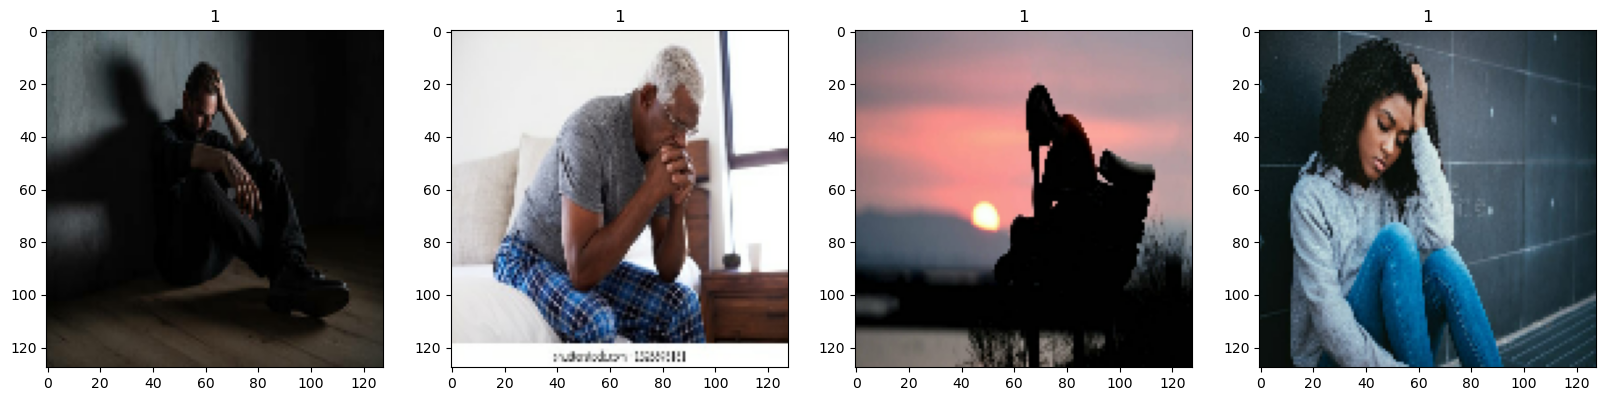

In [90]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [91]:
data=data.map(lambda x,y:(x/255,y))
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()
batch[0].max()

1.0

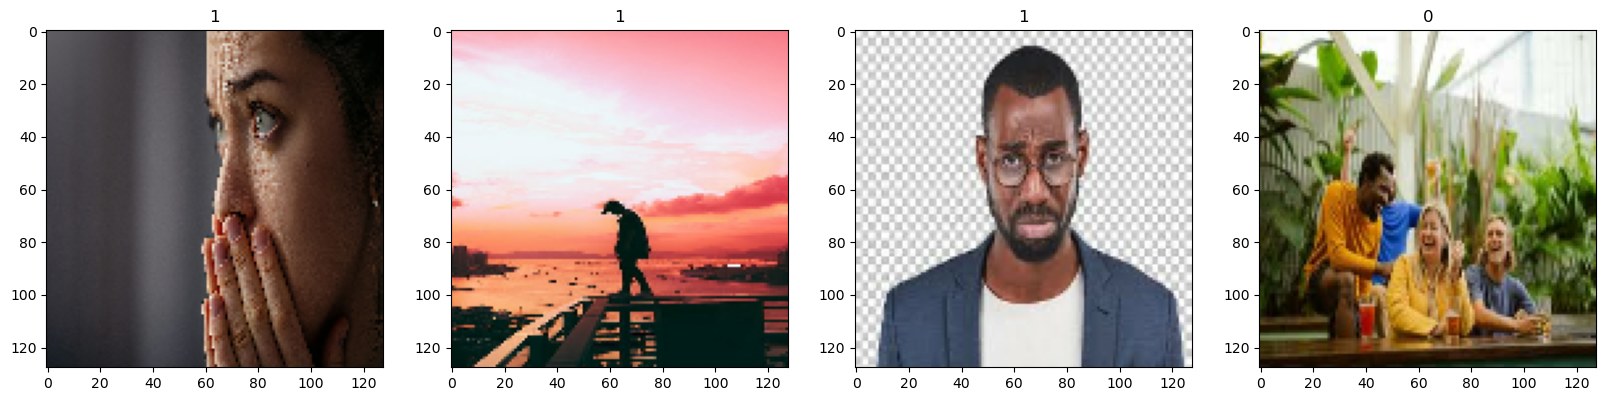

In [92]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [93]:
len(data)

10

In [94]:
train_size=int(len(data)*.5)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [95]:
train_size+val_size+test_size

10

In [96]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [97]:
len(train)

5

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [99]:
model=Sequential()

In [133]:
model.add(Conv2D(16,(3,3),1,activation='relu'))
print("done")
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(14400))

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print("done")

ValueError: Input 0 of layer "conv2d_8" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)

In [118]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [120]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [122]:
logdir='logs'

In [124]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [127]:
hist = model.fit(train,epochs=20,validation_data=val)

Epoch 1/20


ValueError: Input 0 of layer "conv2d_8" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3963318295.py, line 1)